In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.sparse import csc_matrix, csr_matrix
from sklearn.metrics import accuracy_score, classification_report

from neupy.algorithms.rbfn.pnn import PNN

In [10]:
classes = [0,1,2]
markers = ['o','x','^']

In [25]:
X_test = np.array([[3.5, 4.2], [0.5, 4.1], [5, 3.5], [2.9, 1.6], [4, 4.6]])

In [7]:
def prepare_mat_data(matfile):
    task_data = loadmat(matfile)
    X = np.array(task_data['X'].T)
    print('X:{}, Shape:{}'.format(X,X.shape))
    T = np.array(task_data['T'])
    print('T:{}, Shape:{}'.format(T,T.shape))
    Tc = np.array(csr_matrix.todense(task_data['T']))
    print('Tc:{}, Shape:{}'.format(Tc, Tc.shape))
    y_classes = np.array([np.argmax(data) for data in Tc.T]) #reverse one-hot-encoding
    print('Class vector:{}, Shape:{}'.format(y_classes, y_classes.shape))
    return X, y_classes

In [8]:
X, y_classes = prepare_mat_data('zad1')

X:[[1.  1. ]
 [2.  1. ]
 [1.  2. ]
 [2.  2. ]
 [1.5 1.5]
 [2.5 1.5]
 [1.2 2.1]
 [2.  2. ]
 [2.  3. ]
 [3.  2. ]
 [3.  3. ]
 [3.  4. ]
 [4.1 3.9]
 [2.7 2.2]
 [2.6 3.6]
 [3.6 2.4]
 [3.4 3.5]
 [3.8 4.9]
 [4.  3. ]
 [3.  5. ]
 [3.  6. ]
 [4.  4. ]
 [4.  5. ]
 [4.  6. ]
 [5.  6. ]
 [6.  5. ]
 [5.  4. ]], Shape:(27, 2)
T:  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 11)	1.0
  (1, 12)	1.0
  (1, 13)	1.0
  (1, 14)	1.0
  (1, 15)	1.0
  (1, 16)	1.0
  (1, 17)	1.0
  (1, 18)	1.0
  (2, 19)	1.0
  (2, 20)	1.0
  (2, 21)	1.0
  (2, 22)	1.0
  (2, 23)	1.0
  (2, 24)	1.0
  (2, 25)	1.0
  (2, 26)	1.0, Shape:()
Tc:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
  1. 1. 1.]], Shape:(3, 27)
Class vector:[0 0 0 0 0 0 0 

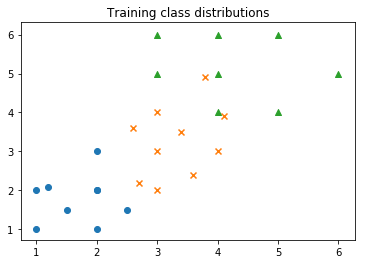

In [21]:
plt.title('Training class distributions')
for i,m in zip(classes,markers):
    class_data = np.where(y_classes == i)
    plt.scatter(X[class_data,0], X[class_data,1], marker=m)

In [13]:
pnn = PNN(std = 0.1)

In [14]:
pnn

PNN(verbose=False, std=0.1, batch_size=128)

In [15]:
pnn.train(X, y_classes)

In [18]:
y_pred = pnn.predict(X_test)

In [34]:
def plot_predictions():
    plt.title('Predictions')
    for i,m in zip(classes,markers):
        class_data = np.where(y_classes == i)
        plt.scatter(X[class_data,0], X[class_data,1], marker=m)
        pred_data = np.where(y_pred == i)
        plt.scatter(X_test[pred_data,0], X_test[pred_data,1], marker=m, c='red', label='Predicted {}'.format(m))
        plt.legend()

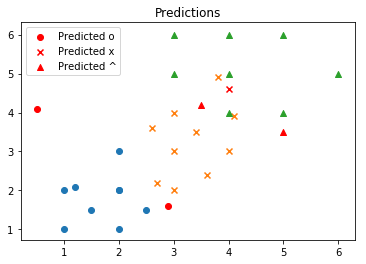

In [35]:
plot_predictions()